In [65]:
from skimage import io
import cv2
from matplotlib.pyplot import imshow, show
import numpy as np

Leitura da imagem pbm

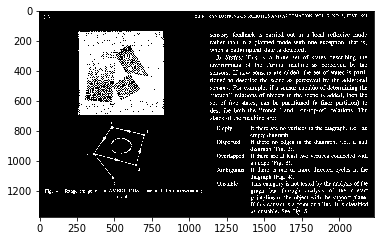

In [136]:
img = cv2.imread('inputs/bitmap.pbm', 0)
img = -cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
imshow(img, cmap='gray')
show()

### Passo 1:
    Dilatação da imagem original com um elemento estruturante de 1 pixel de altura e 100 pixels de largura.

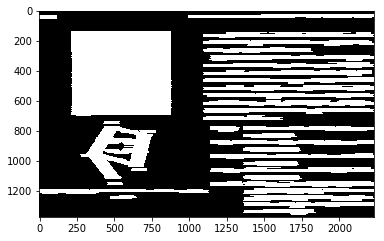

In [138]:
img_1 = img.copy()
kernel = np.ones((1,100), np.uint8)
img_dlt_1 = cv2.dilate(img_1,-kernel,iterations = 1)
imshow(img_dlt_1,cmap='gray')
show()

### Passo 2:
    Erosão da imagem resultante com o mesmo elemento estruturante do passo (1).

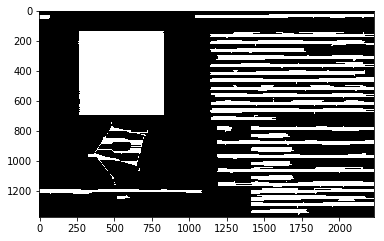

In [139]:
kernel = np.ones((1,100), np.uint8)
img_ers_2 = cv2.erode(img_dlt_1,-kernel,iterations = 1)
imshow(img_ers_2,cmap='gray')
show()

### Passo 3:
    Dilatação da imagem original com um elemento estruturante de 200 pixels de altura e 1 pixel de largura.

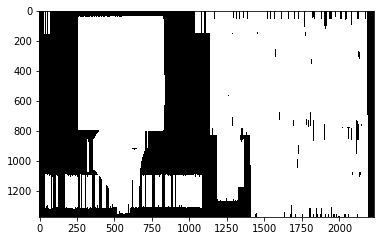

In [140]:
img_3 = img.copy()
kernel = np.ones((200,1), np.uint8)
img_dlt_3 = cv2.dilate(img_3,-kernel,iterations = 1)
imshow(img_dlt_3,cmap='gray')
show()

### Passo 4:
    Erosão da imagem resultante com o mesmo elemento estruturante do passo (3).

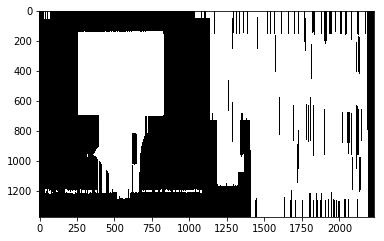

In [141]:
kernel = np.ones((200,1), np.uint8)
img_ers_4 = cv2.erode(img_dlt_3,-kernel,iterations = 1)
imshow(img_ers_4,cmap='gray')
show()

### Passo 5:
    Aplicação da intersecção (AND) dos resultados dos passos (2) e (4).

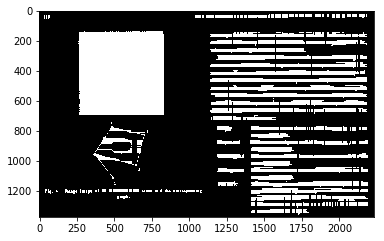

True

In [147]:
img_and_5 = cv2.bitwise_or(img_ers_2,img_ers_4)
imshow(img_and_5, cmap='gray')
show()
img_T = cv2.normalize(img_and_5,  None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
cv2.imwrite('teste.pbm', img_T)

### Passo 6:
     Fechamento do resultado obtido no passo (5) com um elemento estruturante de 1 pixel de altura e 30 pixels de largura

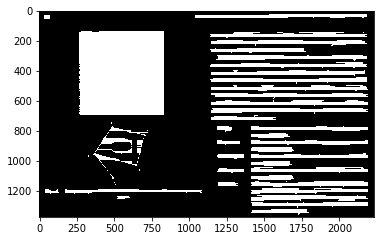

In [150]:
kernel = np.ones((1,30), np.uint8)
img_clg_6 = cv2.morphologyEx(img_and_5, cv2.MORPH_CLOSE, kernel)
imshow(img_clg_6, cmap='gray')
show()

### Passo 7